# Astro 304 "Galaxies"

## Expansion of the universe and distances

### Instructor: Andrey Kravtsov

#### office: ERC 415; email: andrey@oddjob.uchicago.edu

#### github repository: https://github.com/a-kravtsov/a304s18

You can turn this notebook into a slide show using nbconvert package:

jupyter-nbconvert --to slides ex01_distances.ipynb --post serve

### Practical info on python and required packages.

The experiments below use python (within IPython notebook environment), which will be used throughout this class. You should have one of the most commonly used python distributions - <a href="https://www.enthought.com/products/canopy/">Enthought Canopy</a> or <a href="https://www.continuum.io/downloads">Anaconda</a> -  installed on your laptop. Both are free for academic users. Don't be confused at Enthought site: you can request a free Enthought academic license <a href="https://www.enthought.com/academic-subscriptions/">here</a>, which will allow you to get distribution with many add-ons and libraries, such as their proprietory 3d visualization library <tt>Mayavi</tt>. Both Enthought and Anaconda will provide similar capabilities, although the way you interact with packages is somewhat different. Anaconda will come with most packages you need pre-installed, while in Enthought you will need to install some additional packages (which is easy). 

In a given python distro, you can launch Jupyter notebook by loading a notebook file or starting a new notebook using IDE editor (specific to each distro) or via command line: <tt>ipython notebook notebook_name.ipynb</tt>, which will open the notebook in a browser where it can be edited and executed.  

To run examples presented here, you will need to install in addition to python (with standard libraries: matplotlib, numpy, scipy, etc. that come standard with each distribution), the following packages: 

### Required python packages

<tt>pyfits</tt> - package for reading FITS files. The FITS file with the SDSS data that is used below is available here. 

<a href="http://www.astropy.org/"><tt>astropy</tt></a> - some astropy I/O routines are used by some of the code. 

<a href="https://bitbucket.org/bdiemer/colossus/overview"><tt>colossus</tt></a> - Benedikt Diemer's  python package containing useful routines for computing various cosmological quantities (distances, variances, power spectra, halo profiles, etc.) that we will be using throughout this course)

<tt><a href="http://scikit-learn.org/stable/">scikit-learn</a></tt> - python package containing various useful machine learning routines, which we will be using from time to time. The routines are also used by the AstroML package.

<tt><a href="https://pypi.python.org/pypi/astroML/">AstroML</a></tt> - this library was developed to support the book <a href="http://press.princeton.edu/titles/10159.html">''Statistics, Data Mining, and Machine Learning in Astronomy''</a> by Ivezic et al. The book itself is not needed for this course, although I will draw on it in parts of the course. It is very good though and I highly recommend to get and study it. 

We may also need other packages that will be introduced during the course. 

### Preliminaries: set up plotting parameters

In [6]:
import numpy as np

# allow automatic reload of imported codes, if they are modified
%load_ext autoreload
%autoreload 2

# setup notebook for inline figures
%matplotlib inline
import matplotlib.pyplot as plt

from code.plot_utils import plot_pretty
plot_pretty()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Expansion of the universe

Solution of the Einstein's equations of general relativity in the Friedmann-Robertson-Walker (FRW) metric (homogeneous, isotropic space) gives the Friedmann equations for the expansion factor, defined as the distance between two freely expanding points and normalized to be unity at the current time. 

$$
\frac{\ddot{a}}{a}=-\frac{4\pi G}{3}\,(\rho+3p) +\frac{\Lambda}{3},
$$

$$
\left(\frac{\dot{a}}{a}\right)\equiv H(a)^2=\frac{8\pi G\rho}{3} - \frac{k}{a^2} + \frac{\Lambda}{3},
$$

where $H(a)$ is the Hubble expansion rate, equal to $H_0$ at $z=0$, $k$ is space curvature ($k = 0$ corresponds to a spatially flat, Euclidean universe, $k > 0$ to space with positive
curvature, and $k < 0$ to space with negative curvature, such as saddle). $\rho$ is the total energy density of the universe due to matter, radiation, and dark energy, and $p$ is the total pressure equal to the sum of pressures of each component. 

Here $\Lambda$ is the cosmological constant that can be interpreted as the vacuum energy density $\Lambda = 8\pi G\rho_{\Lambda}=-8\pi G p_{\Lambda}$, i.e. equation of state of the vacuum energy is $p_{\Lambda}=-\rho_{\Lambda}.$

The equations above are often recast with densities in units of the critical density of the universe

$$
\rho_{\rm crit}=\frac{3H^2(a)}{8\pi G};\ \ \ \Omega_{\rm m0}=\frac{\rho_{m}(z=0)}{\rho_{\rm crit}};\ \ \ \Omega_\Lambda=\frac{\rho_\Lambda}{\rho_{\rm crit}}.
$$

### Distance - redshift relation

When we observe an object with spectrum red-shifted by a cosmological redshift $z$, this redshift was accumulated during the time light travelled to us after it was emitted by the object. The emitted photons had to play catch up: in addition to covering the initial *physical* distance between us and the object  at the time light was emitted, the photons had to travel additional distance due to expansion of the universe between emission and observation. 

The redshift of the photons during this travel was accumulated via a sequence of small redshifts $dz=H(z)/c\delta d$, where $H(z)=\dot{a}/a$ and $a=1/(1+z)$ is the expansion factor normalized to unity at $z=0$. 

Thus, the total distance traveled by photons to accumulate redshift $z=\int_0^z dz$ is

$$
d_{\rm c}=\int\limits_0^z \delta d=\frac{c}{H_0}\int\limits_0^z\frac{dz^\prime}{E(z^\prime)}, 
$$

where $E(z)=H(z)/H_0$ is the dimensionless Hubble function:

$$
E(z)\equiv H(z)/H_0=\sqrt{\Omega_{\rm m,0}\,(1+z)^3+\Omega_k\,(1+z)^2+\Omega_{\Lambda,0}}
$$

The ratio $c/H_0$ is often denoted as $D_{\rm H}$ -- the Hubble distance:

$$
D_{\rm H}\equiv\frac{c}{H_0}
= 3000\,h^{-1}~{\rm Mpc}= 9.26\times10^{27}\,h^{-1}~{\rm cm}.
$$

### Physical vs comoving distance

In cosmology, the actual physical separation between two objects at a given redshift is called  *proper* or *physical* distance, while distance between these objects at $z=0$, assuming they were moving only with the Hubble expansion flow, is called *comoving* distance. 

Distance $d_{\rm c}$, as defined above, is clearly the distance between observed object and us today ($z=0$) along the line-of-sight to the object because it computes the distance travelled by photon between an object and observer. Thus, $d_{\rm c}$ is called the *line-of-sight comoving distance.* It is often also denoted by $\chi$ in cosmology textbooks.  

Photon's wavelength is increased (redshifted) by a factor $1+z$ between emission and arrival. This means that distances between all freely expanding objects in the universe increased by $1+z$, so relation between physical and comoving distances is given by

$$d_{\rm com} = d_{\rm phys}\, (1+z).$$

### Angular diameter distance

In astronomy we often want to evaluate physical size of an object or of a region that has redshift $z$ and subtends an angle on the sky $\theta$. 

The *angular diameter distance* $d_{\rm A}$ is defined as the
ratio of an object's *physical* transverse size, $s$, to its angular size $\theta$ (in
radians): $s\equiv \theta\, d_{\rm A}$, where we assume small-angle regime. By definition, *we should use the angular diameter distance $d_{\rm A}$ whenever we need to compute size of a region from its apparent angular size.*

How does $d_{\rm A}$ relate to the line of sight comoving distance introduced above?
It's easiest and conceptually clearest to work this out in the case of geometrically flat cosmological models ($\Omega_{\rm k}=0$), when usual Eucledian geometry applies.

Let us consider 3 photons emitted at the same time from the center of the region, and from the distances $\pm s/2$ from the center. As these photons travel towards us, the distance between them grows due to expansion of the universe, so that by the time they are observed by us the distance between off-center photons appears to be $s/a$, while the central photon travelled distance $d_{\rm c}$ to us, as discussed above. Thus, the angle subtended by the emitting region will be 

$$\theta=\frac{s}{a d_{\rm c}}\equiv \frac{s}{d_{\rm A}}$$, where 

$$d_{\rm A}=ad_{\rm c}=d_{\rm c}/(1+z)$$

is an effective distance for which the usual small-angle formula applies. 

In the case of non-flat cosmologies, relation is more complicated because space is curved, so we cannot use simple Eucledian expression relating angle and distance. In the general case, the angular diameter distance is given by: 

$$
d_{\rm A} = \frac{d_{\rm M}}{1+z}, 
$$
where 
$$
d_{\rm M} = \left\{
\begin{array}{ll}
D_{\rm H}\,\frac{1}{\sqrt{\Omega_k}}\,\sinh\left[\sqrt{\Omega_k}\,d_{\rm c}/D_{\rm H}\right] & {\rm for}~\Omega_k>0 \\
d_{\rm c} & {\rm for}~\Omega_k=0 \\
D_{\rm H}\,\frac{1}{\sqrt{|\Omega_k|}}\,\sin\left[\sqrt{|\Omega_k|}\,d_{\rm c}/D_{\rm H}\right] & {\rm for}~\Omega_k<0
\end{array}
\right.
$$

### Luminosity distance

Another commonly encountered situation is when we need to estimate intrinsic luminosity of an object, $L$, given its observed flux, $f$. Luminosity is energy emitted per unit time, while flux is radiation energy received by a detector per unit area per unit time. 

In the non-expanding space, these are related by the distance as $L=4\pi d^2 f$. In the expanding space, expansion affects the rate at which photons are received and the photon energy via redshift. 
The *luminosity distance* $d_{\rm L}$ is defined so that $L=4\pi d^2_{\rm L} f$ in the expanding universe. By definition, *we should use the luminosity distance $d_{\rm L}$ whenever we need to compute intrinsic luminosity of an object from its observed flux.*

For simplicity, we will consider luminosity of photons of a given wavelength $\lambda$; luminosity of photons of other waveleghts can be treated in the same way. 

Distance between two photons emitted at times separated by $\Delta t_{\rm e}$ will initially be $c\Delta t_{\rm e}$, but will grow as the universe expands by $a$ by the time the photons are observed. Thus, the photons will be received with larger time interval, $\Delta t_{\rm o}=\Delta t_{\rm e}/a$, i.e. their flux is reduced by a factor $a$. In addition, the wavelength of the photons, and thus their energy, decreases as they propagate to us by $a$. Thus, the flux through the sphere of radius $d_{\rm c}$ -- the distance photons travelled to us - is reduced by $a^2$ compared to no expansion case: 

$$f=\frac{La^2}{4\pi\,d_{\rm c}^2}\equiv \frac{L}{4\pi\,d_{\rm L}^2},$$ 

where 

$$d_{\rm L}=\frac{d_{\rm c}}{a}=d_{\rm c}(1+z)$$ is the *luminosity distance*.

For a general (not necessarily flat) cosmogical model it is given by 

$$
d_{\rm L} = (1+z)\,d_{\rm M} = (1+z)^2\,d_{\rm A}.
$$

In [7]:
from code.cosmology import d_l, d_a

In [8]:
z = 0.1; Om0 = 0.3; OmL = 0.7
d_H = 2997.92
print("z = %.2f; Om0 = %.2f; Oml = %.2f:"%(z, Om0, OmL))
print("d_L = %.3e /h Mpc; d_A = %.3e /h Mpc"%(d_H*d_l(z, Om0, OmL), d_H*d_a(z, Om0, OmL)))


z = 0.10; Om0 = 0.30; Oml = 0.70:
d_L = 3.222e+02 /h Mpc; d_A = 2.663e+02 /h Mpc


In [9]:
zmin = 0.01; zmax = 10.; nz = 100
z = np.linspace(zmin, zmax, nz)

dL = np.zeros_like(z); dA = np.zeros_like(z)
for i, zd in enumerate(z):
    dL[i] = d_l(zd, Om0, OmL)
    dA[i] = dL[i]/(1.+zd)**2
    
# convert to /h Mpc
dL *= d_H; dA *= d_H

Here is how to use the distance routine in the vectorized way. In this case, for many points the routine computing comoving los distance constructs cubic spline and then uses this spline to compute distances quickly for all points. This will be handy and efficient when we will need to evaluate distances for hundreds of thousands of galaxies in the SDSS. 

In [10]:
# when called with a vector z of size larger than ninter, routine computes distances 
# using cubic spline constructed over [zmin, zmax] interval of z

dLv = d_l(z, Om0, OmL, ninter=20)
dAv = dLv/(1.+z)**2
    
# convert to /h Mpc
dLv *= d_H; dAv *= d_H

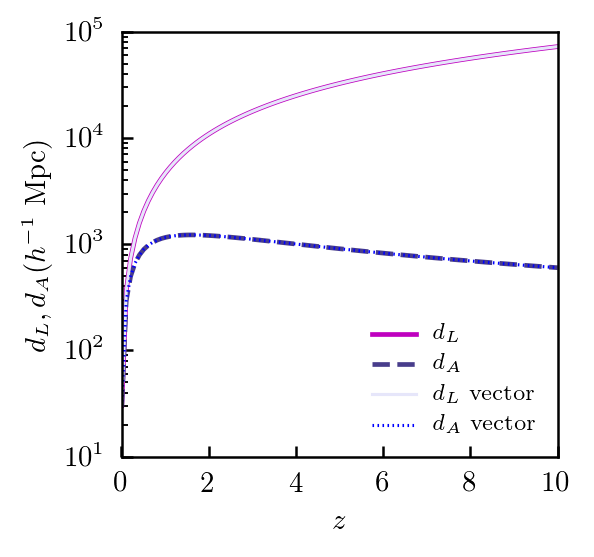

In [13]:
plot_pretty(dpi=225)
# now plot the fractional error as a function of step size
plt.figure(figsize=(2.5,2.5))
plt.xlabel('$z$'); plt.ylabel(r'$d_L, d_A (h^{-1}\ {\rm Mpc})$')
#plt.xscale('log'); 
plt.yscale('log')

plt.xlim([zmin,zmax]); plt.ylim(10.,1.e5)

plt.plot(z, dL, linewidth=1.5, c='m', label='$d_L$')
plt.plot(z, dA, linewidth=1.5, ls ='--', c='darkslateblue', label='$d_A$')
plt.plot(z, dLv, linewidth=1., c='lavender', label='$d_L\ \mathrm{vector}$')
plt.plot(z, dA, linewidth=1., ls =':', c='blue', label='$d_A\ \mathrm{vector}$')

plt.legend(loc='lower right', frameon=False, fontsize=7)
#plt.savefig('fig/dLA_z.pdf', bbox_inches='tight')
plt.show()

Note the peculiar behavior of $d_A$ at high $z$. 